# Offshore Wind Site Suitability
## Edward Xu


#### Run this cell to connect to your GIS and get started:

In [37]:
from arcgis.gis import GIS
gis = GIS("home")
import pandas as pandas
import math as math

ModuleNotFoundError: No module named 'arcpy'

## Importing Geographic Variables

<Item title:"Updated LCOE Variables" type:Feature Layer Collection owner:edwardxu_UMass_Amherst>
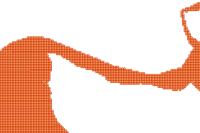

In [26]:
# Item Added From Toolbar
# Title: Updated LCOE Variables | Type: Feature Service | Owner: edwardxu_UMass_Amherst
geography = gis.content.get("9b39bd5b4c2c4742b2c130721db7245f")
geography

## Building a Spatial Dataframe

In [27]:
# Access feature layer attribute table
geography_featurelayer = geography.layers[0].query()

# Convert the attribute table to a spatial dataframe
geography_df = geography_featurelayer.sdf

# Display the dataframe
print(geography_df.head(10))

   Join_Count  DistanceToGridMeters      OPEX  pointid  AverageWindSpeed  \
0           0          49486.439825  26100000     2654           7.51787   
1           0          48488.411428  26100000     2655           7.46405   
2           0          47507.107273  26100000     2656           7.40662   
3           1          46543.585246  32400000     2657            7.4236   
4           1          45598.972644  32400000     2658           7.36171   
5           1          44674.469018  32400000     2659           7.36171   
6           1          43771.348616  32400000     2660           7.28533   
7           1          42890.962258  32400000     2661           7.19046   
8           1          42034.738461  32400000     2662           7.22991   
9           1          41031.955889  32400000     2663           7.15169   

   OBJECTID                                              SHAPE  
0         1  {"x": -13904364.471642919, "y": 6150337.965924...  
1         2  {"x": -13902364.0109

## Calculating LCOE

In [31]:
## Calculating total net energy production over the course of a turbine's lifespan (25 years)
geography_df['TNEP'] = geography_df['AverageWindSpeed'] ** 3 * 1.225 * 0.5 * 36000 * 219000 * 0.6 * 0.489 / 1000000

## Calculating distance factor of 200
geography_df['DistanceFactor'] = geography_df['DistanceToGridMeters'] * 200

## Assigning fixed capital expenses
geography_df['CAPEX'] = geography_df['Join_Count'].apply(lambda x: 47100000 if x == 1 else 57400000)

## Including the distance factor in CAPEX calculations
geography_df['TotalCAPEX'] = geography_df['CAPEX'] + geography_df['DistanceFactor']

## Calculating total expenses
geography_df['Expenses'] = (geography_df['TotalCAPEX'] * 1.0648) + geography_df['OPEX']

## Calculating LCOE
geography_df['LCOE'] = geography_df['Expenses'] / geography_df['TNEP']

print(geography_df.head(10))

   Join_Count  DistanceToGridMeters      OPEX  pointid  AverageWindSpeed  \
0           0          49486.439825  26100000     2654           7.51787   
1           0          48488.411428  26100000     2655           7.46405   
2           0          47507.107273  26100000     2656           7.40662   
3           1          46543.585246  32400000     2657            7.4236   
4           1          45598.972644  32400000     2658           7.36171   
5           1          44674.469018  32400000     2659           7.36171   
6           1          43771.348616  32400000     2660           7.28533   
7           1          42890.962258  32400000     2661           7.19046   
8           1          42034.738461  32400000     2662           7.22991   
9           1          41031.955889  32400000     2663           7.15169   

   OBJECTID                                              SHAPE           TNEP  \
0         1  {"x": -13904364.471642919, "y": 6150337.965924...  602001.055682   
1

## Exporting Feature Layer

In [43]:
## Building point feature layerD from spatial dataframe
geography_df.spatial.to_featurelayer("LCOE")

<Item title:"LCOE" type:Feature Layer Collection owner:edwardxu_UMass_Amherst>